<a href="https://colab.research.google.com/github/merrickfort/Movie-Recommender/blob/main/Leg_Movie_Recommendations_Combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [396]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import requests
import io

In [397]:
import pandas as pd
r = requests.get("https://raw.githubusercontent.com/merrickfort/Movie-Recommender/main/IMDb%20movies.csv")
r = r.content
data = pd.read_csv(io.StringIO(r.decode('utf-8')))
data.head()

/var/folders/n5/smccx2xx4ss7vtnr1mn5fp_w0000gn/T/ipykernel_84739/3272050511.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(io.StringIO(r.decode('utf-8')))


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,NaN,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


# Visualizing the Dataset

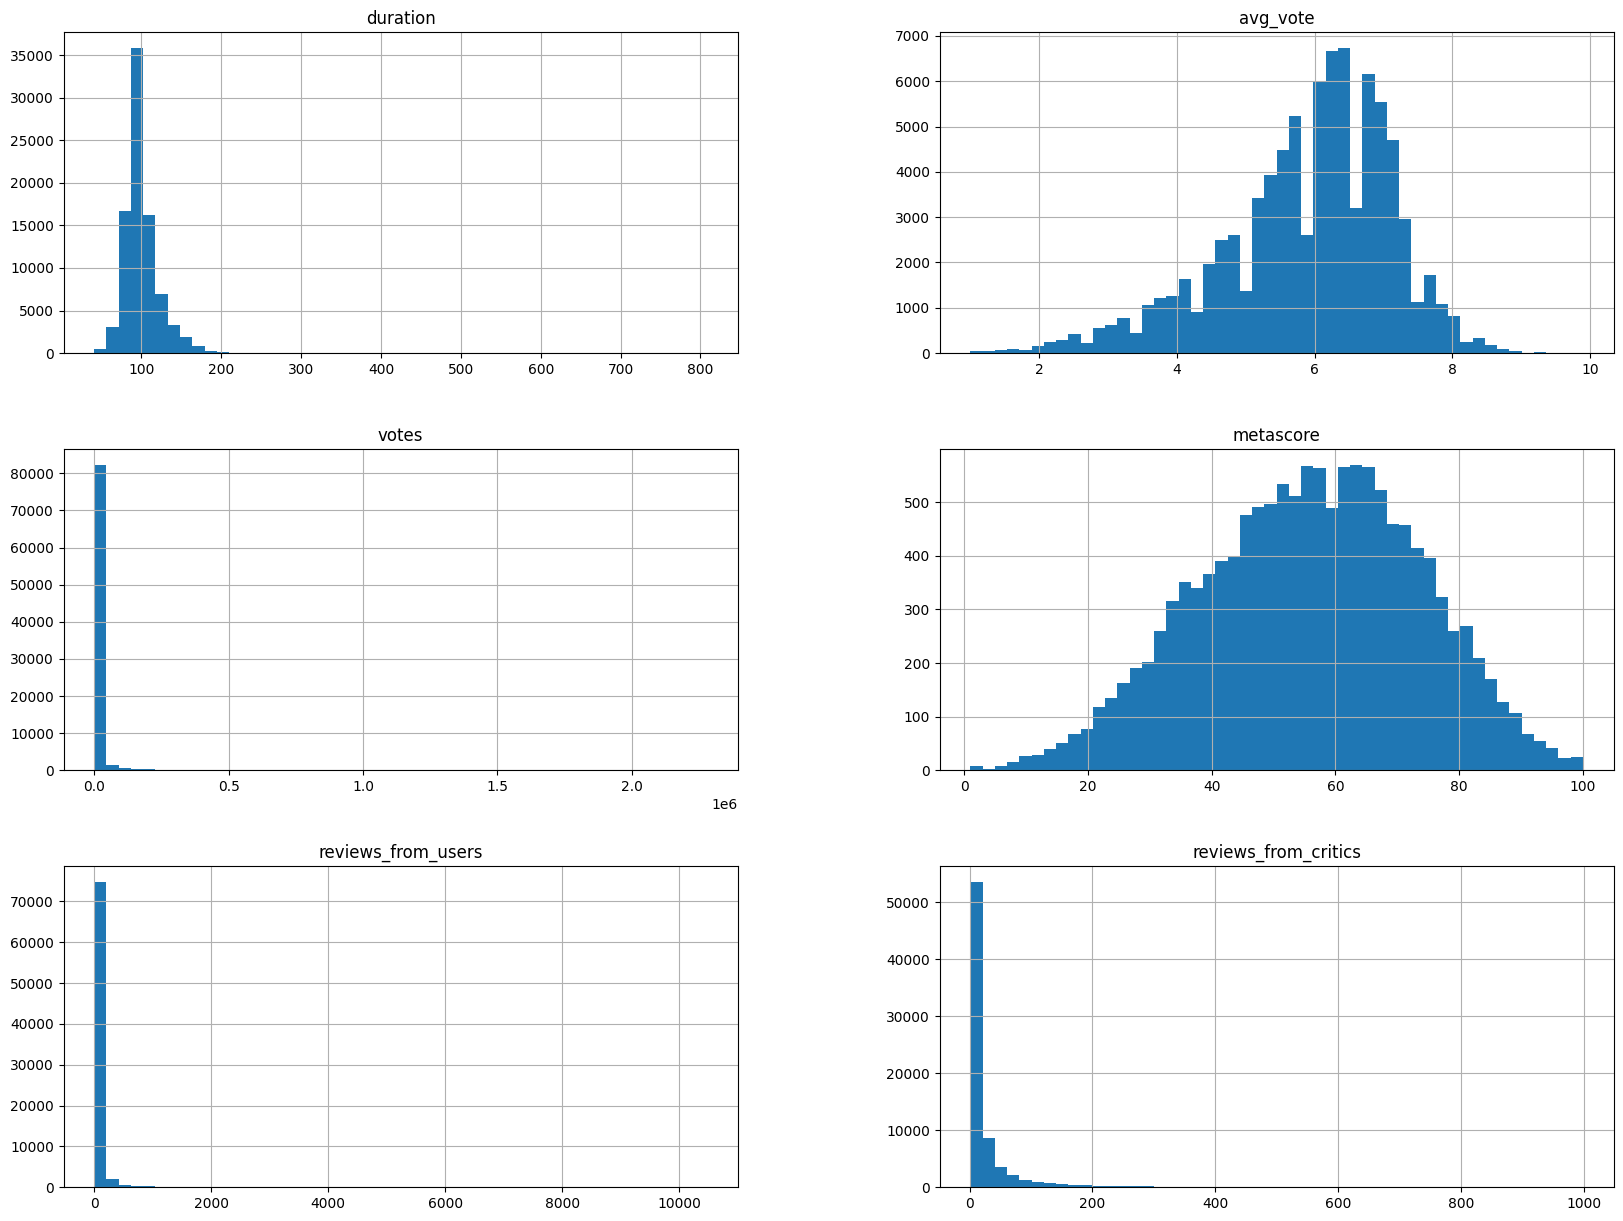

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='avg_vote', ylabel='votes'>

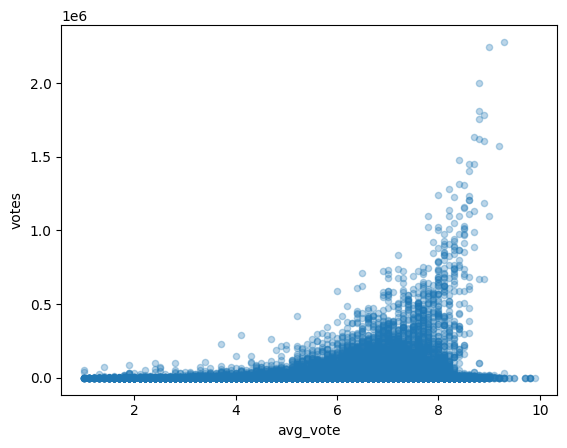

In [ ]:
#Plotting the Avg votes versus the Vote count.

data.plot(kind="scatter", x="avg_vote", y="votes", alpha=0.3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               84954 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [ ]:
data.isnull().sum()       #Locating Null values and understanding incomplete data

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   901
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [ ]:
data.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,85855.000000,85855.000000,8.585500e+04,13305.000000,78258.000000,74058.000000
mean,100.351418,5.898656,9.493490e+03,55.896881,46.040826,27.479989
std,22.553848,1.234987,5.357436e+04,17.784874,178.511411,58.339158
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,88.000000,5.200000,2.050000e+02,43.000000,4.000000,3.000000
50%,96.000000,6.100000,4.840000e+02,57.000000,9.000000,8.000000
75%,108.000000,6.800000,1.766500e+03,69.000000,27.000000,23.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000


# Manipulating the Data

In [398]:
#Dropping irrelevant data labels and unnecessary data for recommendations
movies=data.drop(["imdb_title_id","duration", "title", "date_published", "budget", "usa_gross_income", "reviews_from_users",
                  "reviews_from_critics", "worlwide_gross_income", "metascore"], axis=1)
movies

,original_title,year,genre,country,language,director,writer,production_company,actors,description,avg_vote,votes
0,Miss Jerry,1894,Romance,USA,NaN,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589
2,Den sorte drøm,1911,Drama,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188
3,Cleopatra,1912,"Drama, History",USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446
4,L'Inferno,1911,"Adventure, Drama, Fantasy",Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237
...,...,...,...,...,...,...,...,...,...,...,...,...
85850,Le lion,2020,Comedy,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398
85851,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724
85852,Padmavyuhathile Abhimanyu,2019,Drama,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265
85853,Sokagin Çocuklari,2019,"Drama, Family",Turkey,Turkish,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194


In [399]:
#Need to decrease amount of Data in the dataset so it is manageable by Google collab without crashing.

#removing the movies that are not in english to give more prevalent results, as well as movies with a rating below 2/10, for more popular
#and higher rated movies
movies = movies[movies['language'] == "English"]
movies = movies[movies['avg_vote'] > 5]
movies

,original_title,year,genre,country,language,director,writer,production_company,actors,description,avg_vote,votes
3,Cleopatra,1912,"Drama, History",USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446
5,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,484
9,Richard III,1912,Drama,"France, USA",English,"André Calmettes, James Keane","James Keane, William Shakespeare",Le Film d'Art,"Robert Gemp, Frederick Warde, Albert Gardner, ...",Richard of Gloucester uses manipulation and mu...,5.5,225
17,"Home, Sweet Home",1914,Drama,USA,English,D.W. Griffith,"D.W. Griffith, H.E. Aitken",Majestic Motion Picture Company,"Henry B. Walthall, Josephine Crowell, Lillian ...",John Howard Payne at his most miserable point ...,5.8,187
19,Traffic in Souls,1913,"Crime, Drama",USA,English,George Loane Tucker,NaN,Independent Moving Pictures Co. of America (IMP),"Jane Gail, Ethel Grandin, William H. Turner, M...","A woman, with the aid of her police officer sw...",6.0,552
...,...,...,...,...,...,...,...,...,...,...,...,...
85811,Falling Inn Love,2019,"Comedy, Romance",USA,English,Roger Kumble,"Elizabeth Hackett, Hilary Galanoy",NaN,"Christina Milian, Adam Demos, Jeffrey Bowyer-C...",When city girl Gabriela spontaneously enters a...,5.6,14108
85827,Dream Horse,2020,"Biography, Comedy, Drama",UK,English,Euros Lyn,Neil McKay,Ffilm Cymru Wales,"Toni Collette, Damian Lewis, Siân Phillips, Jo...",Dream Alliance is an unlikely race horse bred ...,5.8,120
85837,VFW,2019,"Action, Crime, Horror",USA,English,Joe Begos,"Max Brallier, Matthew McArdle",Fangoria,"Stephen Lang, William Sadler, Fred Williamson,...",A group of old war veterans put their lives on...,6.1,4178
85838,The Pilgrim's Progress,2019,"Animation, Adventure, Family",USA,English,Robert Fernandez,"John Bunyan, Robert Fernandez",Cat In The Mill Studio,"David Thorpe, John Rhys-Davies, Kristyn Getty,...","An epic journey, faithfully adapted to modern-...",5.7,442


Going through each collumn eliminating and/or replacing null values to complete the data

In [400]:
#dropping rows from Actors, directors, and countries due to small number of null values that wont really effect our recommendation system
movies = movies.dropna(subset=["country"])
movies = movies.dropna(subset=["director"])
movies = movies.dropna(subset=["actors"])
movies                # Dropped 199 rows from total data set

,original_title,year,genre,country,language,director,writer,production_company,actors,description,avg_vote,votes
3,Cleopatra,1912,"Drama, History",USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446
5,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,484
9,Richard III,1912,Drama,"France, USA",English,"André Calmettes, James Keane","James Keane, William Shakespeare",Le Film d'Art,"Robert Gemp, Frederick Warde, Albert Gardner, ...",Richard of Gloucester uses manipulation and mu...,5.5,225
17,"Home, Sweet Home",1914,Drama,USA,English,D.W. Griffith,"D.W. Griffith, H.E. Aitken",Majestic Motion Picture Company,"Henry B. Walthall, Josephine Crowell, Lillian ...",John Howard Payne at his most miserable point ...,5.8,187
19,Traffic in Souls,1913,"Crime, Drama",USA,English,George Loane Tucker,NaN,Independent Moving Pictures Co. of America (IMP),"Jane Gail, Ethel Grandin, William H. Turner, M...","A woman, with the aid of her police officer sw...",6.0,552
...,...,...,...,...,...,...,...,...,...,...,...,...
85811,Falling Inn Love,2019,"Comedy, Romance",USA,English,Roger Kumble,"Elizabeth Hackett, Hilary Galanoy",NaN,"Christina Milian, Adam Demos, Jeffrey Bowyer-C...",When city girl Gabriela spontaneously enters a...,5.6,14108
85827,Dream Horse,2020,"Biography, Comedy, Drama",UK,English,Euros Lyn,Neil McKay,Ffilm Cymru Wales,"Toni Collette, Damian Lewis, Siân Phillips, Jo...",Dream Alliance is an unlikely race horse bred ...,5.8,120
85837,VFW,2019,"Action, Crime, Horror",USA,English,Joe Begos,"Max Brallier, Matthew McArdle",Fangoria,"Stephen Lang, William Sadler, Fred Williamson,...",A group of old war veterans put their lives on...,6.1,4178
85838,The Pilgrim's Progress,2019,"Animation, Adventure, Family",USA,English,Robert Fernandez,"John Bunyan, Robert Fernandez",Cat In The Mill Studio,"David Thorpe, John Rhys-Davies, Kristyn Getty,...","An epic journey, faithfully adapted to modern-...",5.7,442


In [401]:
# locating unknown language movies and replacing null value with "unknown"

movies["language"] = movies["language"].fillna("Unknown")

# NaN values in description set to no description
movies["description"] = movies["description"].fillna("None")
movies["description"].isnull().sum()
movies["writer"] = movies["writer"].fillna("Unknown")
movies["production_company"] = movies["production_company"].fillna("Unknown")

In [402]:
#converting the Int and Float values to str to use
movies['year'] = movies['year'].map(str)
movies['votes'] = movies['votes'].map(str)
movies['avg_vote'] = movies['avg_vote'].map(str)

In [403]:
#Resseting Index for use in recommendation systems
movies.reset_index(inplace=True)



In [404]:
movies = movies.drop(["index"], axis=1)

In [405]:
#creating a copy for second recommendation system

movies2 =movies.drop(["language"], axis=1)
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24313 entries, 0 to 24312
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   original_title      24313 non-null  object
 1   year                24313 non-null  object
 2   genre               24313 non-null  object
 3   country             24313 non-null  object
 4   language            24313 non-null  object
 5   director            24313 non-null  object
 6   writer              24313 non-null  object
 7   production_company  24313 non-null  object
 8   actors              24313 non-null  object
 9   description         24313 non-null  object
 10  avg_vote            24313 non-null  object
 11  votes               24313 non-null  object
dtypes: object(12)
memory usage: 2.2+ MB


,original_title,year,genre,country,language,director,writer,production_company,actors,description,avg_vote,votes
0,Cleopatra,1912,"Drama, History",USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446
1,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,484
2,Richard III,1912,Drama,"France, USA",English,"André Calmettes, James Keane","James Keane, William Shakespeare",Le Film d'Art,"Robert Gemp, Frederick Warde, Albert Gardner, ...",Richard of Gloucester uses manipulation and mu...,5.5,225
3,"Home, Sweet Home",1914,Drama,USA,English,D.W. Griffith,"D.W. Griffith, H.E. Aitken",Majestic Motion Picture Company,"Henry B. Walthall, Josephine Crowell, Lillian ...",John Howard Payne at his most miserable point ...,5.8,187
4,Traffic in Souls,1913,"Crime, Drama",USA,English,George Loane Tucker,Unknown,Independent Moving Pictures Co. of America (IMP),"Jane Gail, Ethel Grandin, William H. Turner, M...","A woman, with the aid of her police officer sw...",6.0,552


# Recommendation System 1 - Demographic(Average Ratings)

In [406]:
moviesAverageRatings = movies

In [407]:
#creates function to recommend the highest rated movies based on its average rating
def recommendPopular(moviesAverageRatings):
  moviesAverageRatings = moviesAverageRatings.sort_values("avg_vote", ascending = False)
  return moviesAverageRatings[["original_title", "avg_vote", "votes"]].head(10)


In [408]:
recommendPopular(moviesAverageRatings)

,original_title,avg_vote,votes
19100,Hopeful Notes,9.7,669
18164,The Moving on Phase,9.5,172
21135,The Best Years,9.4,894
16811,Moussaka & Chips,9.3,912
23624,Love in Kilnerry,9.3,1239
17907,As I Am,9.3,1173
12574,The Shawshank Redemption,9.3,2278845
23329,The Transcendents,9.2,1450
23373,Delaware Shore,9.1,507
23667,National Theatre Live: Angels in America Part ...,9.0,337


# RecommendationSystem 2 - Demographic (Bayes Average)

In [409]:
moviesBayesAverage = movies

In [410]:
#converting the votes and avg_vote back into integers so that it can be used for the data.
moviesBayesAverage['votes'] = moviesBayesAverage['votes'].map(int)
moviesBayesAverage['avg_vote'] = moviesBayesAverage['avg_vote'].map(float)

In [411]:
#function to calculate the c constant in the bayes average formula. The c value takes the number of voters at the confidence level.
def calculateC(moviesBayesAverage, confidenceLevel):

    #sorting the data based on decreasing number of votes
    moviesBayesAverage = moviesBayesAverage.sort_values("votes", ascending = False)

    #resetting the indexes
    moviesBayesAverage.reset_index(inplace=True)

    #Finding confidence level for C value in the bayesian constant.
    index25 = int(24313 * (confidenceLevel))

    #calculates the c constant in the Bayes Average formula
    cValue = moviesBayesAverage.iloc[index25]['votes']

    return cValue

In [412]:
#sets value to c
c = calculateC(moviesBayesAverage, 0.25)
print(c)

4273


In [413]:
#function to calculate the m constant in the bayes average formula.
def calculateM(moviesBayesAverage):
    #augment votes_by_avg_vote in order to calculate m
    moviesBayesAverage["votes_by_avg_vote"] = moviesBayesAverage["votes"]*moviesBayesAverage["avg_vote"]

    #finds total votes of the entire dataset
    totalVotes = moviesBayesAverage['votes'].sum()

    #finds the sum of all ratings made by votes
    ratingSum = moviesBayesAverage['votes_by_avg_vote'].sum()

    #finds the m constant by dividing ratingSum by totalVotes
    mValue = ratingSum/totalVotes

    return mValue

In [414]:
m = calculateM(moviesBayesAverage)
print(m)

7.043994993369201


In [415]:
#function to calculate the bayes average
def calculateBayesAverage(averageRating, numOfMovieVotes, c, m):
    return ((averageRating*numOfMovieVotes)+(c*m))/(numOfMovieVotes+c)

In [416]:
#add the bayes Average to the data frame
moviesBayesAverage["bayesianAverage"] = calculateBayesAverage(moviesBayesAverage["avg_vote"], moviesBayesAverage["votes"], c, m)

In [417]:
#order from highest to lowes bayes average value
moviesBayesAverage = moviesBayesAverage.sort_values("bayesianAverage", ascending = False)

In [418]:
moviesBayesAverage[["original_title", "avg_vote", "votes", "votes_by_avg_vote", "bayesianAverage"]].head(10)

,original_title,avg_vote,votes,votes_by_avg_vote,bayesianAverage
12574,The Shawshank Redemption,9.3,2278845,21193258.5,9.295778
6012,12 Angry Men,8.9,668473,5949409.7,8.888211
13855,Fight Club,8.8,1807440,15905472.0,8.795858
12450,Forrest Gump,8.8,1755490,15448312.0,8.795736
13813,The Matrix,8.7,1632315,14201140.5,8.695676
9584,Star Wars: Episode V - The Empire Strikes Back,8.7,1132073,9849035.1,8.693773
8939,One Flew Over the Cuckoo's Nest,8.7,891071,7752317.7,8.692097
17458,Interstellar,8.6,1449256,12463601.6,8.595426
12838,Se7en,8.6,1402015,12057329.0,8.595272
9248,Star Wars,8.6,1204107,10355320.2,8.594498


<Axes: title={'center': 'bayesianAverage vs. votes'}, xlabel='votes', ylabel='bayesianAverage'>

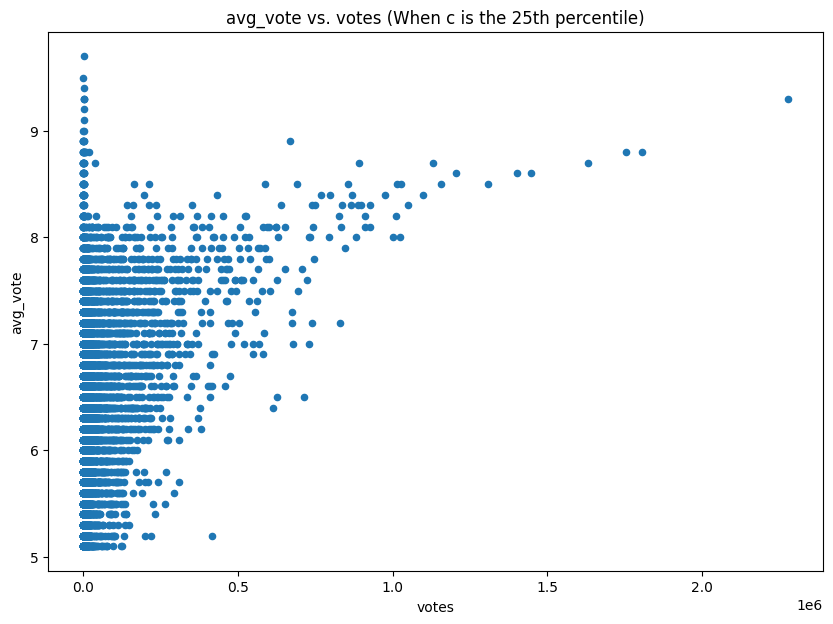

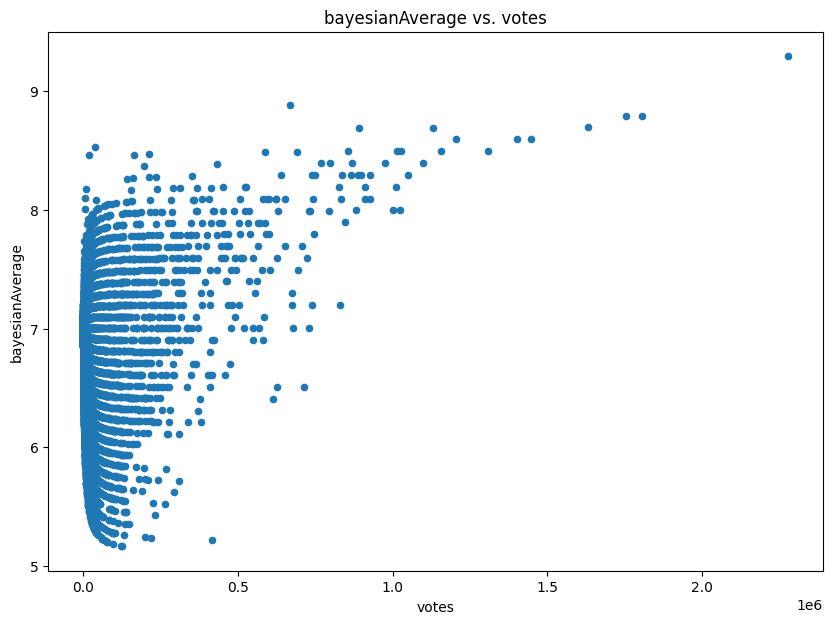

In [419]:
#comparing the Average rating vs votes with the bayesAverage vs. votes

#plots Average Rating vs votes
moviesAverageRatings.plot(kind="scatter", x="votes", y="avg_vote", figsize=(10, 7), title="avg_vote vs. votes (When c is the 25th percentile)")

#plots bayesAverage vs. votes
moviesBayesAverage.plot(kind="scatter", x="votes", y="bayesianAverage", figsize=(10, 7), title="bayesianAverage vs. votes")

What if we decrease the c value?

In [420]:
c = calculateC(moviesBayesAverage, 0.75)
print(c)
moviesBayesAverage["bayesAverage"] = calculateBayesAverage(moviesBayesAverage["avg_vote"], moviesBayesAverage["votes"], c, m)
moviesBayesAverage = moviesBayesAverage.sort_values("bayesAverage", ascending = False)
moviesBayesAverage.head(10)

264


,original_title,year,genre,country,language,director,writer,production_company,actors,description,avg_vote,votes,votes_by_avg_vote,bayesianAverage,bayesAverage
12574,The Shawshank Redemption,1994,Drama,USA,English,Frank Darabont,"Stephen King, Frank Darabont",Castle Rock Entertainment,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,9.3,2278845,21193258.5,9.295778,9.299739
19100,Hopeful Notes,2010,Drama,USA,English,Valerio Zanoli,Valerio Zanoli,High Concept,"Walter Nudo, Colin Ross, Ian Poland, Laural Me...",A young violinist with leukemia brings hope an...,9.7,669,6489.3,7.403539,8.948462
23624,Love in Kilnerry,2019,Comedy,USA,English,"Daniel Keith, Snorri Sturluson",Daniel Keith,Archway Pictures,"Daniel Keith, Kathy Searle, Tony Triano, James...",The elderly resident of a small remote town pa...,9.3,1239,11522.7,7.551105,8.903736
6012,12 Angry Men,1957,"Crime, Drama",USA,English,Sidney Lumet,"Reginald Rose, Reginald Rose",Orion-Nova Productions,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,8.9,668473,5949409.7,8.888211,8.899267
17907,As I Am,2019,"Drama, Fantasy, Romance",USA,English,Anthony Bawn,Anthony Bawn,APB Production,"Andre Myers, Jerimiyah Dunbar, Rodney Chester,...",A story of a young man running from the truth ...,9.3,1173,10908.9,7.529910,8.885536
23329,The Transcendents,2018,"Music, Mystery, Thriller",USA,English,Derek Ahonen,Derek Ahonen,Unknown,"Rob Franco, Savannah Welch, Kathy Valentine, W...","Roger, a Rasputin-like drifter, is in search o...",9.2,1450,13340.0,7.590248,8.867920
21135,The Best Years,2013,"Comedy, Crime, Drama",UK,English,Danny Patrick,Danny Patrick,Empire Productions,"Connor Barr, Leon Bearman, Nigel Boyle, Ayden ...",Peace is declared in Northern Ireland after th...,9.4,894,8403.6,7.451634,8.862880
13855,Fight Club,1999,Drama,"USA, Germany",English,David Fincher,"Chuck Palahniuk, Jim Uhls",Fox 2000 Pictures,"Edward Norton, Brad Pitt, Meat Loaf, Zach Gren...",An insomniac office worker and a devil-may-car...,8.8,1807440,15905472.0,8.795858,8.799744
12450,Forrest Gump,1994,"Drama, Romance",USA,English,Robert Zemeckis,"Winston Groom, Eric Roth",Paramount Pictures,"Tom Hanks, Rebecca Williams, Sally Field, Mich...","The presidencies of Kennedy and Johnson, the e...",8.8,1755490,15448312.0,8.795736,8.799736
16811,Moussaka & Chips,2005,Adventure,UK,English,Danny Patrick,"Emily Corcoran, Danny Patrick",Empire Productions,"Ron Moody, Mike Reid, Miles Petit, Danny Ogle,...",Getaway driver Miles Foster is placed in witne...,9.3,912,8481.6,7.440808,8.793550


<Axes: title={'center': 'bayesAverage vs. votes (When c is the 25th percentile)'}, xlabel='votes', ylabel='bayesAverage'>

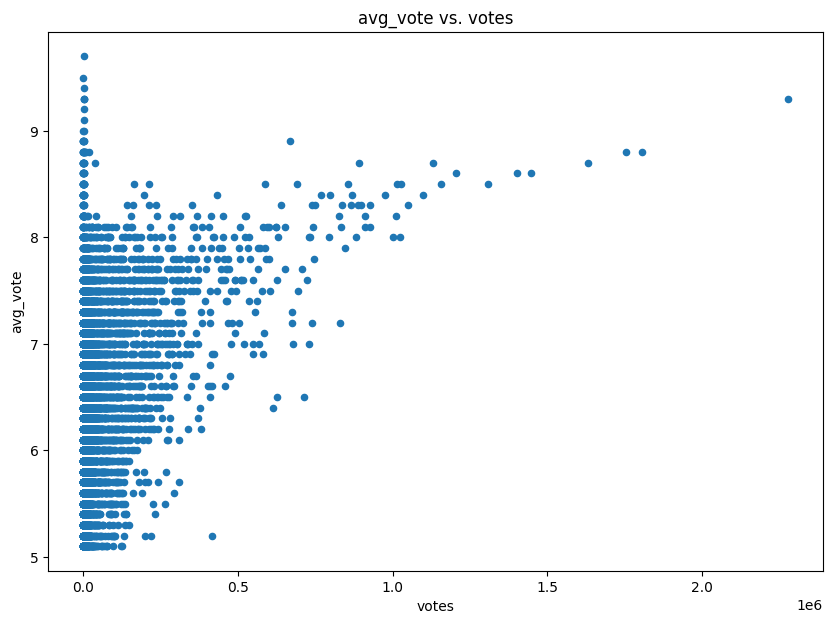

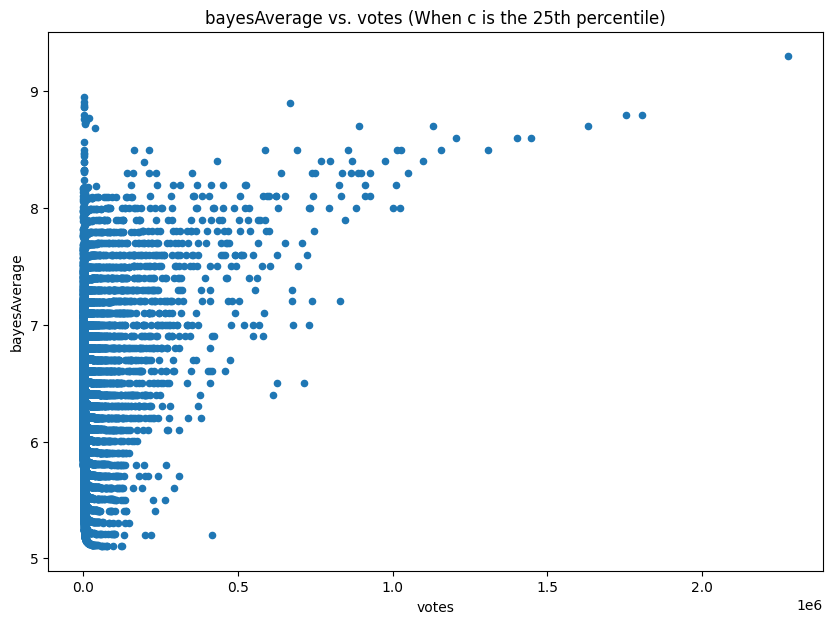

In [421]:
#comparing the Average rating vs votes with the bayesAverage vs. votes when the c value is lower for the bayesAverage.

#plots Average Rating vs votes
moviesAverageRatings.plot(kind="scatter", x="votes", y="avg_vote", figsize=(10, 7), title="avg_vote vs. votes")

#plots bayesAverage vs. votes
moviesBayesAverage.plot(kind="scatter", x="votes", y="bayesAverage", figsize=(10, 7), title="bayesAverage vs. votes (When c is the 25th percentile)")

It causes the need for a higher level of votes to decrease when decreasing c.

# Recommendation System 1-Content[Description based]

In [422]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#stop_words = english removes any non essential words like she they and for. Basically llows us to only have descriptive words
vectorizer = TfidfVectorizer(stop_words='english')
#using tfidf_matrix here and fitting our description
vectorizer_transformed = vectorizer.fit_transform(movies['description'])
#using cosine similairty in the evauluation for finding similarity between movies based on description
cosine_simi = cosine_similarity(vectorizer_transformed, vectorizer_transformed)
#matching the indeces with the orignial title to call on in function
indices = pd.Series(movies.index, index=movies['original_title']).drop_duplicates()

In [423]:
def recommendationsSystem1(title, cosine_sim=cosine_simi):
    #enumerate keeps track of how many iterattions and loops over an object multiple times
    idx = indices[title]
    sim = list(enumerate(cosine_sim[idx]))
    #sim sorts through similarity scores to give us the highest ones
    sim = sorted(sim, key=lambda x: x[1], reverse=True)
    #follows similar method as the previous system
    sim = sim[1:11]

    movieIndex = [i[0] for i in sim]

    print("Cosine Similarity Score List in order:\n" + str(sim) + "\n")
    return movies['original_title'].iloc[movieIndex]

In [427]:
recommendationsSystem1("The Greatest Showman")

Cosine Similarity Score List in order:
[(9654, 0.21528841358883483), (17851, 0.19425354978816012), (12851, 0.17713347096698773), (15062, 0.15707544029641557), (6943, 0.1546332798616633), (22579, 0.14140830612303235), (12589, 0.1362861671385445), (9027, 0.13625648903012277), (1313, 0.13604228533521837), (13158, 0.13474863353039507)]



9654              The Octagon
17851       The Young Messiah
12851           Sweet Nothing
15062                  S1m0ne
6943                    Gypsy
22579           God's Compass
12589           Spider & Rose
9027     From Noon Till Three
1313             The Crusades
13158             What Is It?
Name: original_title, dtype: object

# Recommendation System 2-Content[Metadata usage]

In [428]:
pip install rake_nltk


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [429]:
import nltk; nltk.download('stopwords')
nltk.download('punkt')
import numpy as np
import pandas as pd
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/merrickfort/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/merrickfort/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [430]:
for index, row in movies2.iterrows():
    plot = row['description']

    # rake function uses the objects and basically removes the punctiation and takes out important key words
    #removes fluff words form the description
    rake = Rake()
    rake.extract_keywords_from_text(plot)
    important_words = rake.get_word_degrees()


    row['description'] = list(important_words.keys())


#movies2.drop(columns = ['description'], inplace = True)
# link for usage of rake https://pypi.org/project/rake-nltk/

In [431]:
#Reorganizing and structuring the data to make it more usable


movies2['genre'] = movies2['genre'].map(lambda x: x.lower().split(','))
movies2['country'] = movies2['country'].map(lambda x: x.lower().split(','))
movies2['year'] = movies2['year'].map(lambda x: x.lower().split(','))
movies2['avg_vote'] = movies2['avg_vote'].map(lambda x: x.lower().split(','))
movies2['votes'] = movies2['votes'].map(lambda x: x.lower().split(','))
movies2['director'] = movies2['director'].map(lambda x: x.split(',')[:1])
movies2['writer'] = movies2['writer'].map(lambda x: x.split(',')[:1])
movies2['production_company'] = movies2['production_company'].map(lambda x: x.split(',')[:1])
movies2['actors'] = movies2['actors'].map(lambda x: x.split(',')[:5])

# turning the names into one word names
for index, row in movies2.iterrows():
    row['actors'] = [x.lower().replace(' ','') for x in row['actors']]
    row['director'] = [x.lower().replace(' ','') for x in row['director']]
    row['production_company'] = [x.lower().replace(' ','') for x in row['production_company']]
    row['writer'] = [x.lower().replace(' ','') for x in row['writer']]

In [432]:
movies2.head()

,original_title,year,genre,country,director,writer,production_company,actors,description,avg_vote,votes
0,Cleopatra,[1912],"[drama, history]",[usa],[Charles L. Gaskill],[Victorien Sardou],[Helen Gardner Picture Players],"[Helen Gardner, Pearl Sindelar, Miss Fieldin...",The fabled queen of Egypt's affair with Roman ...,[5.2],[446]
1,"From the Manger to the Cross; or, Jesus of Naz...",[1912],"[biography, drama]",[usa],[Sidney Olcott],[Gene Gauntier],[Kalem Company],"[R. Henderson Bland, Percy Dyer, Gene Gaunti...","An account of the life of Jesus Christ, based ...",[5.7],[484]
2,Richard III,[1912],[drama],"[france, usa]",[André Calmettes],[James Keane],[Le Film d'Art],"[Robert Gemp, Frederick Warde, Albert Gardne...",Richard of Gloucester uses manipulation and mu...,[5.5],[225]
3,"Home, Sweet Home",[1914],[drama],[usa],[D.W. Griffith],[D.W. Griffith],[Majestic Motion Picture Company],"[Henry B. Walthall, Josephine Crowell, Lilli...",John Howard Payne at his most miserable point ...,[5.8],[187]
4,Traffic in Souls,[1913],"[crime, drama]",[usa],[George Loane Tucker],[Unknown],[Independent Moving Pictures Co. of America (I...,"[Jane Gail, Ethel Grandin, William H. Turner...","A woman, with the aid of her police officer sw...",[6.0],[552]


In [433]:
#setting the indexes to the Title instead of the index numbers, so we can just combine all columns later and
#keep the title seperate
movies2.set_index('original_title', inplace = True)
movies2.head()

,year,genre,country,director,writer,production_company,actors,description,avg_vote,votes
original_title,,,,,,,,,,
Cleopatra,[1912],"[drama, history]",[usa],[Charles L. Gaskill],[Victorien Sardou],[Helen Gardner Picture Players],"[Helen Gardner, Pearl Sindelar, Miss Fieldin...",The fabled queen of Egypt's affair with Roman ...,[5.2],[446]
"From the Manger to the Cross; or, Jesus of Nazareth",[1912],"[biography, drama]",[usa],[Sidney Olcott],[Gene Gauntier],[Kalem Company],"[R. Henderson Bland, Percy Dyer, Gene Gaunti...","An account of the life of Jesus Christ, based ...",[5.7],[484]
Richard III,[1912],[drama],"[france, usa]",[André Calmettes],[James Keane],[Le Film d'Art],"[Robert Gemp, Frederick Warde, Albert Gardne...",Richard of Gloucester uses manipulation and mu...,[5.5],[225]
"Home, Sweet Home",[1914],[drama],[usa],[D.W. Griffith],[D.W. Griffith],[Majestic Motion Picture Company],"[Henry B. Walthall, Josephine Crowell, Lilli...",John Howard Payne at his most miserable point ...,[5.8],[187]
Traffic in Souls,[1913],"[crime, drama]",[usa],[George Loane Tucker],[Unknown],[Independent Moving Pictures Co. of America (I...,"[Jane Gail, Ethel Grandin, William H. Turner...","A woman, with the aid of her police officer sw...",[6.0],[552]


In [434]:
#creating the mix of strs to use in cosine similarity scoring later on, makes one large list per item in the dataframe
movies2['alphabetSoup'] = ''
columns = movies2.columns
print(movies2.columns)
for index, row in movies2.iterrows():
    words = ''
    for col in columns:
        words = words + ' '.join(row[col]) + ' '
    movies2.at[index, "alphabetSoup"] = words



movies2.drop(columns = [col for col in movies2.columns if col!= 'alphabetSoup'], inplace = True)

Index(['year', 'genre', 'country', 'director', 'writer', 'production_company',
       'actors', 'description', 'avg_vote', 'votes', 'alphabetSoup'],
      dtype='object')


In [435]:
movies2

,alphabetSoup
original_title,
Cleopatra,1963 biography drama history switzerland uk...
"From the Manger to the Cross; or, Jesus of Nazareth",1912 biography drama usa Sidney Olcott Gene G...
Richard III,1995 drama sci-fi war uk Richard Loncraine I...
"Home, Sweet Home",1914 drama usa D.W. Griffith D.W. Griffith Maj...
Traffic in Souls,1913 crime drama usa George Loane Tucker Unkn...
...,...
Falling Inn Love,2019 comedy romance usa Roger Kumble Elizabet...
Dream Horse,2020 biography comedy drama uk Euros Lyn Nei...
VFW,2019 action crime horror usa Joe Begos Max B...


In [436]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#stop_words = english removes any non essential words like she they and for. Basically allows us to only have descriptive words
vectorizer = TfidfVectorizer(stop_words='english')
#using tfidf_matrix here and fitting our description
vectorizer_transformed = vectorizer.fit_transform(movies2['alphabetSoup'])


# function for calling when index is needed with cosine similarity later on
indices = pd.Series(movies2.index)
indices[:5]

0                                            Cleopatra
1    From the Manger to the Cross; or, Jesus of Naz...
2                                          Richard III
3                                     Home, Sweet Home
4                                     Traffic in Souls
Name: original_title, dtype: object

In [437]:
# the cosine similarity matrix
cosine_sim = cosine_similarity(vectorizer_transformed, vectorizer_transformed)

In [438]:
# function for analyzing simalarity scores, returns 10 movies based on highest ones
def recommendationsSystem2(title, cosine_sim = cosine_sim):

    recommended = []

    # gettin the index of the movie that matches the title
    index = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    similarity_scores = pd.Series(cosine_sim[index]).sort_values(ascending = False)

    # top ten highest movies excluding first movie because it is the input
    highest_similarity = list(similarity_scores.iloc[1:11].index)

    # adding labels and titles
    for i in highest_similarity:
        recommended.append(list(movies2.index)[i])

    print("Cosine Similarity Score List in descending order:\n" + str(similarity_scores.iloc[1:11]) + "\n")
    return recommended

In [439]:
#Calling the function for our recommendations

recommendationsSystem2('The Truman Show')

Cosine Similarity Score List in descending order:
15062    0.261586
19406    0.219703
8744     0.202840
23022    0.201922
8245     0.189062
16023    0.188807
19123    0.187681
21656    0.182222
13706    0.174259
14602    0.166112
dtype: float64



['S1m0ne',
 'In Time',
 'The Cars That Ate Paris',
 'Anon',
 'Homesdale',
 'The Squid and the Whale',
 'The Host',
 'Good Kill',
 "What Rats Won't Do",
 'Believe']